<ipython-input-6-923bf1a2c58b>:31: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_chunk = pd.merge(chunk, label_df, left_on="0", right_on="0", how="left")
<ipython-input-6-923bf1a2c58b>:31: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_chunk = pd.merge(chunk, label_df, left_on="0", right_on="0", how="left")
<ipython-input-6-923bf1a2c58b>:31: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_chunk = pd.merge(chunk, label_df, left_on="0", right_on="0", how="left")
<ipython-input-6-923bf1a2c58b>:31: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_chunk = pd.merge(chunk, label_df, left_on="0", right_on="0", how="left")
<ipython-input-6-923bf1a2c58b>:31: UserWarning: You 

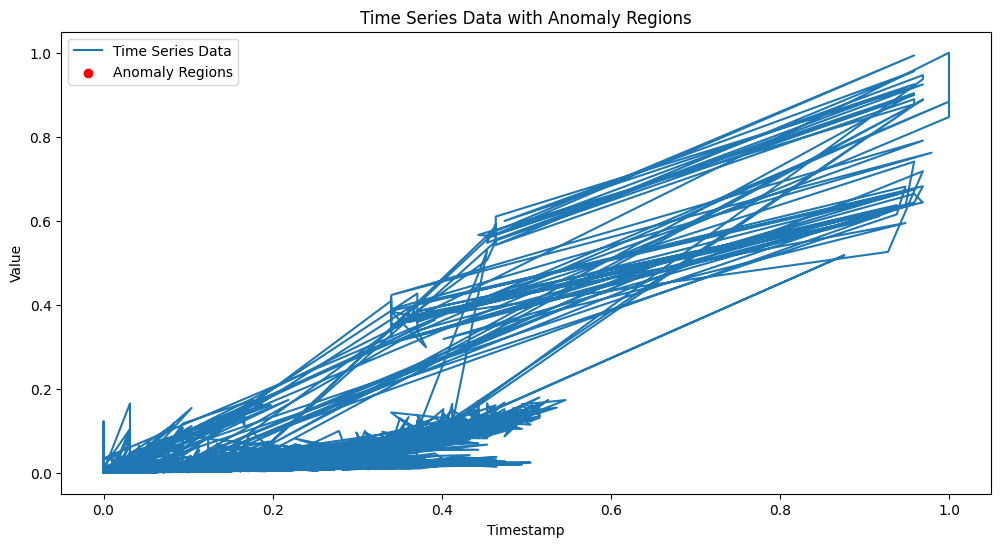

EDA Summary:
                 0            1            2            3            4  \
count  7001.000000  7001.000000  7001.000000  7001.000000  7001.000000   
mean      0.123774     0.026118     0.035180     0.038506     0.320786   
std       0.150717     0.077394     0.090734     0.097164     0.456325   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.001309     0.001747     0.002355     0.000000   
50%       0.062500     0.004769     0.005098     0.006054     0.000000   
75%       0.191919     0.020478     0.028834     0.032195     0.976471   
max       1.000000     1.000000     0.965050     0.986175     0.976471   

                 5            6       7            8            9  ...  \
count  7001.000000  7001.000000  7001.0  7001.000000  7001.000000  ...   
mean      0.459873     0.336795     0.0     0.010397     0.000411  ...   
std       0.347345     0.313560     0.0     0.050707     0.008934  ...   
min       0.000000     0

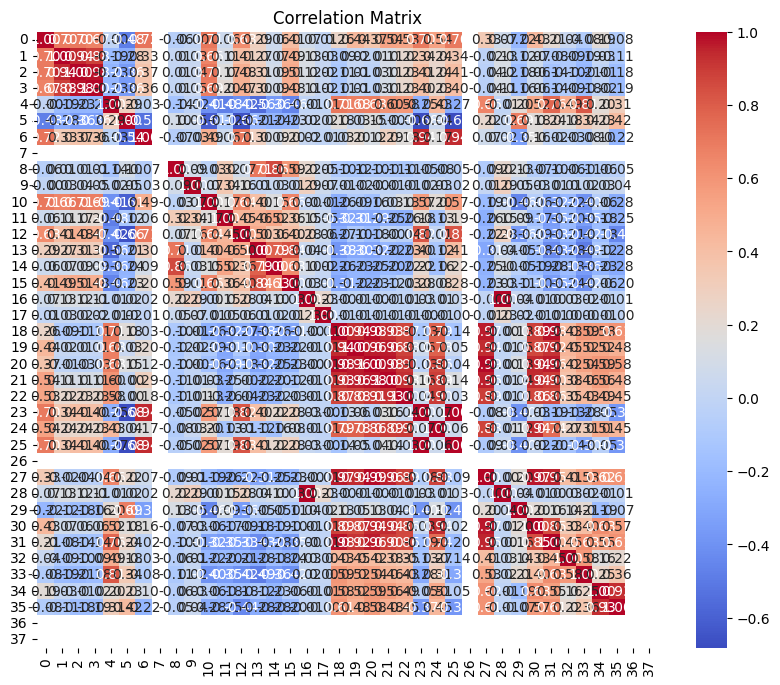


Variables Correlated with Anomaly:
3     0.978168
1     0.943344
10    0.714149
0     0.703310
15    0.506676
12    0.481250
25    0.407600
23    0.406994
6     0.374811
13    0.309477
24    0.236799
22    0.234322
11    0.165208
28    0.120694
16    0.120694
21    0.107543
14    0.090182
30    0.058206
9     0.038826
17    0.023632
19    0.013929
8     0.007734
34   -0.013403
20   -0.026591
27   -0.044251
32   -0.100031
18   -0.113988
31   -0.136642
29   -0.177140
35   -0.179044
33   -0.211609
4    -0.228707
5    -0.356945
7          NaN
26         NaN
36         NaN
37         NaN
Name: 2, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to read data in chunks
def read_data_chunks(file_path, chunk_size):
    chunks = pd.read_csv(file_path, chunksize=chunk_size, header=None)  # No header row
    return chunks

# Function to downsample data
def downsample_data(df, sample_size):
    sampled_df = df.sample(n=sample_size, random_state=42)
    return sampled_df

# Load label data
label_df = pd.read_csv("/content/drive/MyDrive/files/test_label.csv")

# Set chunk size and sample size
chunk_size = 100  # Adjust according to available memory
sample_size = 10  # Adjust according to dataset size

# Process data in chunks
# Process data in chunks
# Process data in chunks
merged_df_list = []
for chunk in pd.read_csv("/content/drive/MyDrive/files/test.csv", chunksize=chunk_size):
    # Convert the column to the same data type as the label data before merging
    chunk['0'] = chunk['0'].astype(float)

    # Merge chunk with label data
    merged_chunk = pd.merge(chunk, label_df, left_on="0", right_on="0", how="left")

    # Check if merging produced any valid data
    if not merged_chunk.empty:
        # Downsample merged chunk if it has enough rows
        if len(merged_chunk) >= sample_size:
            downsampled_chunk = merged_chunk.sample(n=sample_size, random_state=42, replace=False)
        else:
            downsampled_chunk = merged_chunk
        # Append to list
        merged_df_list.append(downsampled_chunk)
    else:
        print("Merged chunk is empty. Skipping...")

# Concatenate all chunks
merged_df = pd.concat(merged_df_list)


# Check if any valid data was processed
if len(merged_df_list) > 0:
    # Concatenate all chunks
    merged_df = pd.concat(merged_df_list)

    # Plot time series data with anomaly regions
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['0'], merged_df['1'], label='Time Series Data')
    plt.scatter(merged_df[merged_df['2'] == 1]['0'],
                merged_df[merged_df['2'] == 1]['1'],
                color='red', label='Anomaly Regions')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title('Time Series Data with Anomaly Regions')
    plt.legend()
    plt.show()

    # Perform EDA
    print("EDA Summary:")
    print(merged_df.describe())

    # Find out root cause
    correlation_matrix = merged_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    # Find out variables which are the root cause for the anomaly
    anomaly_corr = correlation_matrix['2'].drop('2').sort_values(ascending=False)
    print("\nVariables Correlated with Anomaly:")
    print(anomaly_corr)
else:
    print("No valid data was processed. Please check your input file.")
